# Classification using Minimum Distance Classifier(MDC) and K-Nearest Neighbours(KNN)



## Load Data

In [1]:
# Uncomment to mount your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import pandas as pd
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/StressDataset.txt',delimiter='\t')


In [5]:
data.tail()
data.describe()

,Wife Salary,Husband Salary,Stressed
count,399.000000,399.000000,399.000000
mean,5.337063,6.557677,0.501253
std,3.055497,4.607956,0.500626
min,0.085700,0.014890,0.000000
25%,2.969150,3.409900,0.000000
50%,4.654600,5.532000,1.000000
75%,7.786600,8.321650,1.000000
max,13.423500,22.760400,1.000000


In [6]:
data.columns

Index(['Wife Salary', 'Husband Salary', 'Stressed'], dtype='object')

In [7]:

data=data.rename(columns={'Wife Salary':'X', 'Husband Salary':'Y', 'Stressed':'L'})


In [8]:
data

,X,Y,L
0,3.3058,5.7942,0
1,3.4699,6.6262,0
2,0.8672,2.5809,0
3,3.0329,4.0078,0
4,3.4023,5.3059,0
...,...,...,...
394,4.8162,5.5817,1
395,7.2975,10.4028,1
396,10.9658,10.9009,1
397,7.6459,6.8287,1


## Visualize Data

Text(0.5, 1.0, 'Stressed Dataset')

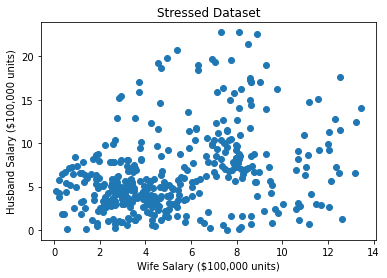

In [9]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X'], data['Y'])
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset')

Text(0.5, 1.0, 'Stressed Dataset')

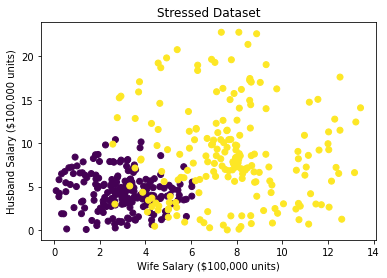

In [10]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X'], data['Y'],c=data['L'])
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset')

### Select records based on Values

In [11]:
data['X']

0       3.3058
1       3.4699
2       0.8672
3       3.0329
4       3.4023
        ...   
394     4.8162
395     7.2975
396    10.9658
397     7.6459
398    10.6112
Name: X, Length: 399, dtype: float64

In [12]:
data['X'][0]

3.3058

In [13]:
data['L']==1

0      False
1      False
2      False
3      False
4      False
       ...  
394     True
395     True
396     True
397     True
398     True
Name: L, Length: 399, dtype: bool

In [14]:
data['X'][data['L']==1]

199     6.2875
200     8.6119
201     9.1760
202     2.6593
203     6.7268
        ...   
394     4.8162
395     7.2975
396    10.9658
397     7.6459
398    10.6112
Name: X, Length: 200, dtype: float64

## Visualize Data - Suitable for different classes

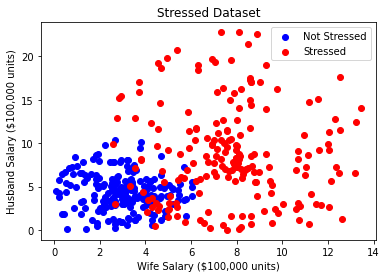

In [15]:
plt.scatter(data['X'][data['L']==0], data['Y'][data['L']==0],label='Not Stressed',color='blue')
plt.scatter(data['X'][data['L']==1], data['Y'][data['L']==1],label='Stressed',color='red')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset')
plt.legend()

## Split Data


In [18]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data[['X','Y']], data['L'], test_size=0.3)


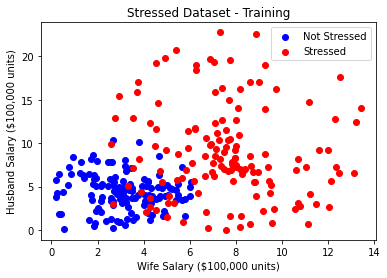

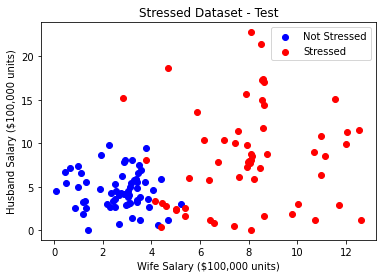

In [19]:
plt.scatter(X_training['X'][Y_training==0],X_training['Y'][Y_training==0],label='Not Stressed',color='blue')
plt.scatter(X_training['X'][Y_training==1],X_training['Y'][Y_training==1],label='Stressed',color='red')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset - Training')
plt.legend()
plt.figure()
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset - Test')
plt.legend()

## MDC Classifier

1.   Find Class mean (For all different classes in the training Data)
2.   Classify test data based on the distance to the mean of classes



In [20]:
from sklearn.neighbors import NearestCentroid
model=NearestCentroid()
model.fit(X_training,Y_training)

NearestCentroid()

In [21]:
Y_training_predicted=model.predict(X_training)
Y_testing_predicted=model.predict(X_testing)
Y_testing_predicted

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

### Evaluate MDC result

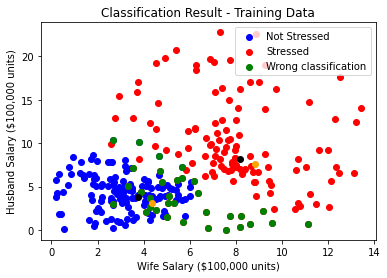

In [22]:
plt.scatter(X_training['X'][Y_training==0],X_training['Y'][Y_training==0],label='Not Stressed',color='blue')
plt.scatter(X_training['X'][Y_training==1],X_training['Y'][Y_training==1],label='Stressed',color='red')
plt.scatter(X_training['X'][Y_training!=Y_training_predicted],X_training['Y'][Y_training!=Y_training_predicted],label='Wrong classification',color='green')
plt.scatter(X_training['Y'][Y_training==0].mean(),X_training['X'][Y_training==0].mean(),c='orange')
plt.scatter(X_training['Y'][Y_training==1].mean(),X_training['X'][Y_training==1].mean(),c='orange')
plt.scatter(model.centroids_.mean(axis=1)[0],model.centroids_.mean(axis=1)[0],c='black')
plt.scatter(model.centroids_.mean(axis=1)[1],model.centroids_.mean(axis=1)[1],c='black')

plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - Training Data')
plt.legend()

In [23]:
import numpy as np
print(X_training['X'][Y_training==1].mean())
print(X_training['Y'][Y_training==1].mean())

print(np.array([X_training['X'][Y_training==1].mean(), X_training['Y'][Y_training==1].mean()]).mean())
(X_training['X'][Y_training==1].sum() + X_training['Y'][Y_training==1].sum())/290
print(X_training['X'][Y_training==1].sum()/145)
X_training['X'][Y_training==1].count()

7.57516338028169
8.8347361971831
8.204949788732394
7.418435862068965


142

In [24]:
model.centroids_

array([[3.13341401, 4.36783358],
       [7.57516338, 8.8347362 ]])

In [25]:
model.centroids_.mean(axis=1)

array([3.7506238 , 8.20494979])

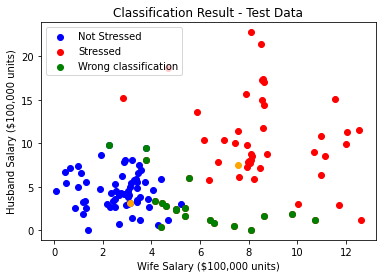

In [26]:
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.scatter(X_testing['X'][Y_testing!=Y_testing_predicted],X_testing['Y'][Y_testing!=Y_testing_predicted],label='Wrong classification',color='green')
plt.scatter(X_training['X'][Y_training==0].mean(),X_training['X'][Y_training==0].mean(),c='orange')
plt.scatter(X_training['X'][Y_training==1].mean(),X_training['X'][Y_training==1].mean(),c='orange')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - Test Data')
plt.legend()

In [27]:
X_testing['X'][Y_testing!=Y_testing_predicted].count()

19

## K-Nearst Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)


KNeighborsClassifier()

In [29]:
Y_training_predicted_KNN=modelKNN.predict(X_training)
Y_testing_predicted_KNN=modelKNN.predict(X_testing)

### Evaluate KNN result

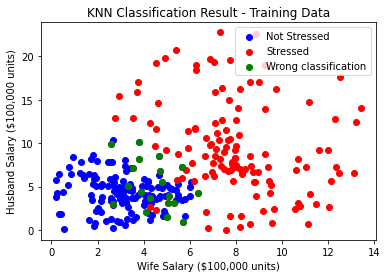

In [30]:
plt.scatter(X_training['X'][Y_training==0],X_training['Y'][Y_training==0],label='Not Stressed',color='blue')
plt.scatter(X_training['X'][Y_training==1],X_training['Y'][Y_training==1],label='Stressed',color='red')
plt.scatter(X_training['X'][Y_training!=Y_training_predicted_KNN],X_training['Y'][Y_training!=Y_training_predicted_KNN],label='Wrong classification',color='green')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('KNN Classification Result - Training Data')
plt.legend()

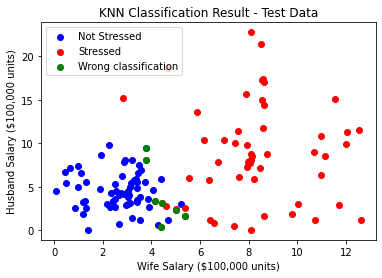

In [31]:
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.scatter(X_testing['X'][Y_testing!=Y_testing_predicted_KNN],X_testing['Y'][Y_testing!=Y_testing_predicted_KNN],label='Wrong classification',color='green')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('KNN Classification Result - Test Data')
plt.legend()

In [32]:
misclassified_testing =abs(Y_testing-Y_testing_predicted_KNN).sum()
print("KNN Number of Misclassified Points  - Testing Data: ", misclassified_testing)
misclassified_training=abs(Y_training - Y_training_predicted_KNN).sum()
print("KNN Number of Misclassified Points  - Training  Data: ", misclassified_training)

misclassified_testing =abs(Y_testing-Y_testing_predicted).sum()
print("MDC Number of Misclassified Points  - Testing Data: ", misclassified_testing)
misclassified_training=abs(Y_training - Y_training_predicted).sum()
print("MDC Number of Misclassified Points  - Training  Data: ", misclassified_training)

KNN Number of Misclassified Points  - Testing Data:  7
KNN Number of Misclassified Points  - Training  Data:  19
MDC Number of Misclassified Points  - Testing Data:  19
MDC Number of Misclassified Points  - Training  Data:  33
